In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
fangraphs = pd.read_csv('./fangraphs_season_level.csv')
savant = pd.read_csv('./savant_pitch_level.csv')

In [4]:
savant.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,...,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
count,2135260.00,2135075.00,2135075.00,2136337.00,2136337.00,2135285.00,477478.00,2136337.00,2136337.00,2136337.00,...,2136337.00,2136337.00,2126707.00,2136337.00,2136199.00,2136337.00,2136337.00,2136337.00,2136337.00,2136337.00
mean,88.91,-0.79,5.81,615015.87,612938.96,9.08,5.09,0.88,0.90,2022.00,...,2.26,2.27,175.59,0.00,0.00,0.57,0.43,31.21,8.32,1.47
std,6.10,1.85,0.55,61021.46,62150.60,4.23,2.63,0.97,0.83,0.82,...,2.56,2.64,72.04,0.03,0.24,0.49,0.49,26.64,6.90,0.70
min,30.10,-5.34,0.76,405395.00,405395.00,1.00,1.00,0.00,0.00,2021.00,...,0.00,0.00,0.00,-0.78,-1.54,0.00,0.00,1.00,1.00,1.00
25%,84.60,-2.10,5.54,592206.00,592662.00,5.00,2.00,0.00,0.00,2021.00,...,0.00,0.00,132.00,0.00,-0.07,0.00,0.00,9.00,3.00,1.00
50%,89.80,-1.49,5.85,641154.00,623352.00,11.00,5.00,1.00,1.00,2022.00,...,1.00,1.00,199.00,0.00,-0.02,1.00,0.00,22.00,6.00,1.00
75%,93.80,0.98,6.15,664702.00,663752.00,13.00,8.00,2.00,2.00,2023.00,...,3.00,4.00,222.00,0.00,0.04,1.00,1.00,50.00,13.00,2.00
max,104.80,4.75,8.11,807799.00,701643.00,14.00,9.00,4.00,3.00,2023.00,...,28.00,28.00,360.00,0.91,3.65,1.00,1.00,131.00,35.00,5.00


In [5]:
savant.pitch_name.value_counts() / len(savant) * 100

pitch_name
4-Seam Fastball   33.58
Slider            17.67
Sinker            15.41
Changeup          11.14
Curveball          7.52
Cutter             7.34
Sweeper            2.87
Knuckle Curve      2.01
Split-Finger       1.78
Slurve             0.35
Other              0.15
Eephus             0.05
Forkball           0.04
Slow Curve         0.01
Knuckleball        0.01
Pitch Out          0.01
Screwball          0.00
Name: count, dtype: float64

In [22]:
reliever['IP'].describe()

count    560.000000
mean      58.022500
std        9.379607
min       42.100000
25%       51.000000
50%       58.000000
75%       64.200000
max       84.100000
Name: IP, dtype: float64

In [28]:
savant.description.unique()
# swinging_strike, foul_tip, swinging_strike_blocked, bunt_foul_tip, missed_bunt

array(['swinging_strike', 'foul', 'ball', 'hit_into_play', 'blocked_ball',
       'called_strike', 'foul_tip', 'hit_by_pitch', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout', 'unknown_strike'], dtype=object)

In [38]:
fangraphs.columns

Index(['PlayerId', 'MLBAMID', 'Name', 'NameASCII', 'Throws', 'Season', 'Age',
       'Team', 'Role', 'G',
       ...
       'Pit_plus_FC', 'Stf_plus_FS', 'Loc_plus_FS', 'Pit_plus_FS',
       'Stf_plus_FO', 'Loc_plus_FO', 'Pit_plus_FO', 'Stuff_plus',
       'Location_plus', 'Pitching_plus'],
      dtype='object', length=308)

In [45]:
fangraphs.loc[(fangraphs['IP'] > 100) & (fangraphs['ERA'] > 5) & (fangraphs['Age'] > 26), ['Name', 'Season', 'WAR', 'Stuff_plus']]

,Name,Season,WAR,Stuff_plus
2207,Jordan Lyles,2021,0.078050,93.874362
2216,Garrett Richards,2021,0.494649,91.978236
2224,Mike Foltynewicz,2021,-0.583556,94.904153
2234,Matt Harvey,2021,1.857620,87.492549
2250,Zach Davies,2021,-0.045773,76.375952
2275,Jorge LÃ³pez,2021,0.765107,99.062126
2327,Erick Fedde,2021,1.133910,91.390867
2332,JT Brubaker,2021,0.330649,88.890722
2486,Kyle Gibson,2022,1.858880,92.996203
2530,JosÃ© BerrÃ­os,2022,1.060430,100.330085


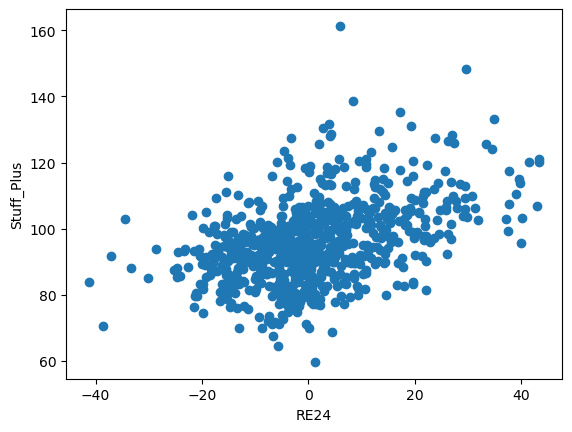

array([[1.        , 0.55568429],
       [0.55568429, 1.        ]])

In [166]:
reliever = fangraphs[(fangraphs['Role']=='SP') & (fangraphs['IP'] > 15)]
plt.scatter(reliever['RE24'], reliever['Stuff_plus'])
plt.xlabel('RE24')
plt.ylabel('Stuff_Plus')
plt.show()

np.corrcoef(reliever['SwStr_pct'], reliever['Stuff_plus'])

In [56]:
savant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136337 entries, 0 to 2136336
Data columns (total 91 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   pitch_type                       object 
 1   game_date                        object 
 2   release_speed                    float64
 3   release_pos_x                    float64
 4   release_pos_z                    float64
 5   player_name                      object 
 6   batter                           int64  
 7   pitcher                          int64  
 8   events                           object 
 9   description                      object 
 10  zone                             float64
 11  des                              object 
 12  game_type                        object 
 13  stand                            object 
 14  p_throws                         object 
 15  home_team                        object 
 16  away_team                        object 
 17  type    

In [172]:
savant['release_pos_x']

0          0.84
1          1.03
2         -1.85
3          1.86
4          0.60
           ... 
2136332   -1.70
2136333    3.13
2136334    1.10
2136335    1.21
2136336   -2.67
Name: release_pos_x, Length: 2136337, dtype: float64

In [77]:
not_wanted = ['MLBAMID','Name','NameASCII', 'Team',]
features = fangraphs[fangraphs.columns[~fangraphs.columns.isin(not_wanted)]]

In [78]:
features

,PlayerId,Throws,Season,Age,Role,G,GS,IP,TBF,W,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,R,2021,33,RP,5,0,4.0,19,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,R,2021,34,RP,3,0,6.0,26,0,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,R,2021,35,RP,1,0,1.0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,R,2021,35,RP,4,0,4.0,17,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,R,2021,35,RP,69,0,62.0,276,7,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,27758,L,2023,21,SP,7,7,34.2,147,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.130102,99.156803,97.885544
3321,29832,L,2023,24,SP,1,1,5.0,22,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.754667,97.617333,98.346667
3322,29911,L,2023,24,SP,21,21,109.1,459,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.592770,100.785066,96.961583
3323,29928,L,2023,25,SP,7,7,34.1,164,2,...,94.022222,NaN,NaN,NaN,NaN,NaN,NaN,81.532394,106.065317,97.501408


In [27]:
savant.groupby(['game_year', 'role_key']).pitch_number_appearance.sum()


game_year  role_key
2021       RP           3930778
           SP          17674120
2022       RP           3754634
           SP          18465683
2023       RP           4202254
           SP          18656212
Name: pitch_number_appearance, dtype: int64

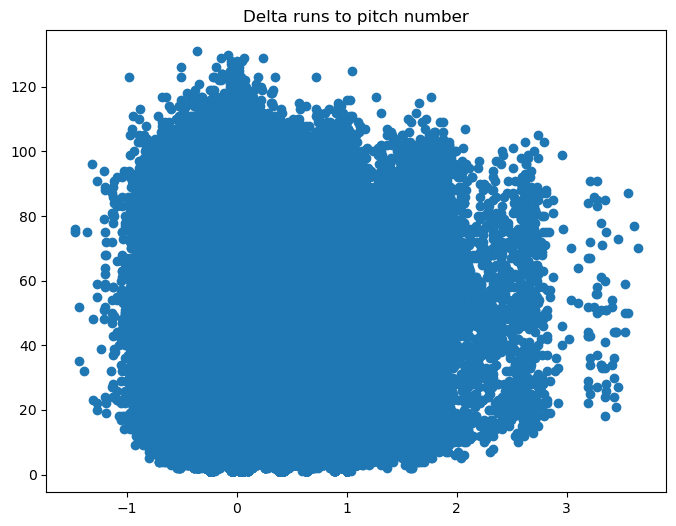

In [98]:
# Scatterplot of pitches thrown to delta run expentancy

fig, axes = plt.subplots(figsize = (8,6))

delta_sp = savant.loc[(savant['role_key'] == 'SP'),'delta_run_exp']
pitches_thrown_sp = savant.loc[(savant['role_key'] == 'SP'), 'pitch_number_appearance']

axes.scatter(delta_sp, pitches_thrown_sp)
plt.title('Delta runs to pitch number')
plt.show()

In [97]:
# Lets try to find important pitching features using XGBoost:

features.isna().sum().iloc[100:150]

Pull_pct                5
Cent_pct                5
Oppo_pct                5
Soft_pct                5
Med_pct                 5
Hard_pct                5
TTO_pct                 0
FRM                     0
K_pct_plus              0
BB_pct_plus             0
K_per_9_plus            3
BB_per_9_plus           3
K_to_BB_plus          322
H_per_9_plus            3
HR_per_9_plus           3
AVG_plus                0
WHIP_plus               3
BABIP_plus              6
LOB_pct_plus           61
GB_pct_plus             5
LD_pct_plus             5
FB_pct_plus             5
HR_to_FB_pct_plus      84
Pull_pct_plus           5
Cent_pct_plus           5
Oppo_pct_plus           5
Med_pct_plus            5
Hard_pct_plus           5
EV                      5
LA                      5
Barrels                 0
Barrel_pct              5
maxEV                   5
HardHit                 0
HardHit_pct             5
FA_pct                 13
FAv                    13
SL_pct                653
SLv         

In [39]:
data = savant.loc[(savant['role_key'] == 'SP') & (savant['pitch_type'] == 'FF'), ['delta_run_exp', 'release_spin_rate']].reset_index(drop=True)




In [40]:
data.rename(columns={'delta_run_exp':'run_exp', 'release_spin_rate':'spin_rate'}, inplace=True)

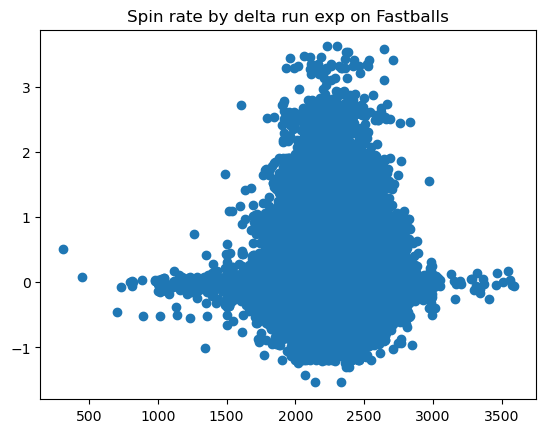

In [41]:
plt.scatter(data['spin_rate'], data['run_exp'])
plt.title('Spin rate by delta run exp on Fastballs')
plt.show()

In [42]:
savant['pitch_type'].unique()

array(['FF', 'SL', 'CU', 'SI', 'CH', 'FS', 'KC', 'FC', 'SV', 'ST', 'FA',
       'CS', 'PO', 'EP', nan, 'SC', 'KN', 'FO'], dtype=object)

In [43]:
savant[savant['pitch_type'] == 'FC'].describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,...,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
count,156812.000000,156777.000000,156777.000000,156820.000000,156820.000000,156815.000000,34816.000000,156820.000000,156820.000000,156820.000000,...,156820.000000,156820.00000,156182.000000,156820.000000,156820.000000,156820.000000,156820.000000,156820.000000,156820.000000,156820.000000
mean,89.006994,-0.785779,5.874527,615166.139408,593231.478243,8.993081,5.296013,0.890154,0.810184,2022.040977,...,2.123524,2.29143,178.361610,0.000037,-0.000524,0.605478,0.394522,32.603367,8.754438,1.513997
std,3.381949,1.819734,0.439410,61300.961616,73705.323876,4.316253,2.590969,0.971093,0.797296,0.817927,...,2.423988,2.62319,33.956812,0.029007,0.249041,0.488749,0.488749,27.097463,7.077792,0.728581
min,74.200000,-4.040000,2.840000,405395.000000,425794.000000,1.000000,1.000000,0.000000,0.000000,2021.000000,...,0.000000,0.00000,0.000000,-0.736000,-1.537000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,86.800000,-2.050000,5.580000,592206.000000,543037.000000,5.000000,3.000000,0.000000,0.000000,2021.000000,...,0.000000,0.00000,161.000000,0.000000,-0.067000,0.000000,0.000000,10.000000,3.000000,1.000000
50%,88.700000,-1.450000,5.890000,641343.000000,608379.000000,9.000000,5.000000,1.000000,1.000000,2022.000000,...,1.000000,1.00000,181.000000,0.000000,-0.023000,1.000000,0.000000,23.000000,6.000000,1.000000
75%,90.800000,0.750000,6.180000,664761.000000,657424.000000,13.000000,8.000000,2.000000,1.000000,2023.000000,...,3.000000,4.00000,197.000000,0.000000,0.036000,1.000000,1.000000,53.000000,14.000000,2.000000
max,104.000000,4.550000,7.510000,807799.000000,701643.000000,14.000000,9.000000,3.000000,2.000000,2023.000000,...,25.000000,25.00000,359.000000,0.794000,3.554000,1.000000,1.000000,123.000000,35.000000,5.000000


In [125]:

not_want =  ['FC', 'SV', 'ST', 'FA', 'CS', 'PO', 'EP','SC', 'KN', 'FO']
savant = savant[~savant['pitch_type'].isin(not_want) & ~savant['pitch_type'].isna()].reset_index(drop=True).copy()
savant



,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
0,FF,2021-04-05,93.2,0.84,5.74,"Duffy, Danny",592696,518633,strikeout,swinging_strike,...,Standard,166.0,-0.014,-0.134,SP,1,0,97,22,3
1,SL,2021-04-05,82.9,1.03,5.69,"Duffy, Danny",592696,518633,NaN,foul,...,Standard,309.0,0.000,0.000,SP,1,0,96,22,3
2,FF,2021-04-05,94.6,-1.85,5.77,"Foltynewicz, Mike",543760,592314,caught_stealing_3b,ball,...,Standard,220.0,0.014,-0.202,SP,1,0,95,19,3
3,FF,2021-04-05,97.1,1.86,6.57,"Rodón, Carlos",657108,607074,field_out,hit_into_play,...,Standard,147.0,-0.007,-0.264,SP,1,0,95,22,3
4,FF,2021-04-05,93.6,0.60,5.85,"Duffy, Danny",592696,518633,NaN,ball,...,Standard,164.0,0.000,0.043,SP,1,0,95,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903731,SI,2023-05-26,90.2,-1.70,3.83,"Kelly, Kevin",605141,687330,NaN,called_strike,...,Standard,245.0,0.000,-0.038,RP,0,1,1,1,1
1903732,SL,2023-05-26,88.3,3.13,5.19,"Scott, Tanner",621493,656945,NaN,called_strike,...,Standard,238.0,0.000,-0.038,RP,0,1,1,1,1
1903733,FF,2023-05-26,89.7,1.10,5.73,"Alexander, Tyler",660162,641302,NaN,ball,...,Standard,147.0,0.000,0.036,RP,0,1,1,1,1
1903734,FF,2023-05-26,92.6,1.21,6.25,"Poche, Colin",571970,621363,NaN,called_strike,...,Standard,184.0,0.000,-0.063,RP,0,1,1,1,1


In [126]:
savant.pitch_type.unique()

array(['FF', 'SL', 'CU', 'SI', 'CH', 'FS', 'KC'], dtype=object)

In [128]:
righty = savant.loc[(savant['role_key'] == 'SP') & (savant['p_throws'] == 'R'), ['release_speed', 'release_pos_x', 'release_pos_y', 'pfx_x', 'pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'effective_speed', 'release_spin_rate', 'release_extension', 'delta_run_exp']].reset_index(drop=True)


In [106]:
metrics = metrics.dropna(subset=['release_pos_x', 'release_pos_y', 'pfx_z', 'vy0', 'vz0', 'ax', 'delta_run_exp']).reset_index(drop=True)


In [107]:
metrics.isna().sum()

release_speed          17
release_pos_x           0
release_pos_y           0
pfx_x                   5
pfx_z                   0
vx0                     0
vy0                     0
vz0                     0
ax                      0
ay                      0
az                      0
effective_speed       156
release_spin_rate    4332
release_extension    1501
delta_run_exp           0
dtype: int64

<Axes: >

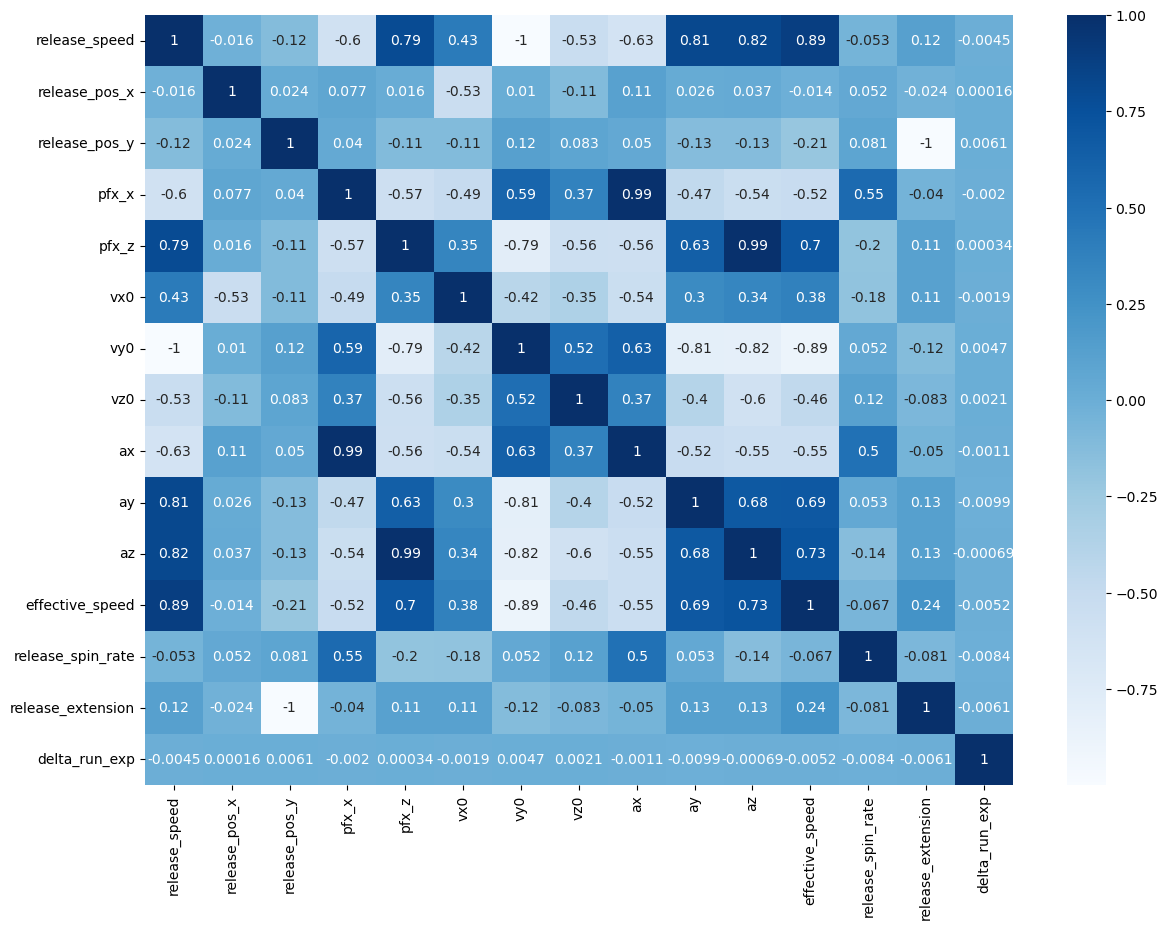

In [130]:
# Note I want to do each pitch.
corr = righty.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = metrics[['release_pos_x', 'release_pos_y', 'pfx_z', 'vy0', 'vz0', 'ax']]
y = metrics['delta_run_exp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)




Predictions:  [ 0.00174793 -0.00138123  0.00147559 ...  0.00423887 -0.00083416
  0.00010211]


In [117]:
import numpy as np
np.where(predictions > 0)

(array([     0,      2,      5, ..., 243862, 243865, 243867]),)

In [94]:
metrics[['release_pos_x', 'release_pos_y', 'pfx_z', 'vy0', 'vz0', 'ax']].isna().sum()

release_pos_x    0
release_pos_y    0
pfx_z            4
vy0              0
vz0              0
ax               0
dtype: int64

# Features

Independent variables: 'release_pos_x', 'release_pos_y', 'pfx_z', 'vy0', 'vz0', 'ax', 'spin_rate'.

Dependent Variable: Run Value

In [387]:
features = savant[['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_y', 'pfx_x', 'pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'effective_speed', 'release_spin_rate', 'release_extension', 'delta_run_exp']]
features['pfx_x'] = abs(features['pfx_x']) * 12
features['pfx_z'] = abs(features['pfx_z']) * 12

fastball = features[features['pitch_type'].isin(['FF', 'SI'])]
breakin = features[features['pitch_type'].isin(['SL', 'CU', 'FC', 'KC'])]
offspead = features[features['pitch_type'].isin(['CH', 'FS'])]

# Maybe break it off to RHP and LHP later.

/var/folders/0m/p03jcv9j4td3thddmd99m0300000gp/T/ipykernel_23423/2942786023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['pfx_x'] = abs(features['pfx_x']) * 12
/var/folders/0m/p03jcv9j4td3thddmd99m0300000gp/T/ipykernel_23423/2942786023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['pfx_z'] = abs(features['pfx_z']) * 12


In [388]:
print('Average run value on fastball', round(fastball.delta_run_exp.mean(), 3))

Average run value on fastball 0.0


In [389]:
fastball = fastball.select_dtypes([np.number]).dropna()

features = fastball
X = features.drop(columns=['delta_run_exp'])
y = features['delta_run_exp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 1)

lr = LinearRegression(n_jobs = -1).fit(X_train, y_train)


pred_fb = lr.predict(X)
y_pred_test = lr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE on Test Set: {mse}')
print(f'Root MSE on Test Set: {rmse}')

MSE on Test Set: 1.8095698074280234e-30
Root MSE on Test Set: 1.3452025153961107e-15


In [390]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
alpha = 0.8
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

y_pred_test = ridge_model.predict(X_test_scaled)

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE on Test Set: {mse}')
print(f'Root MSE on Test Set: {rmse}')

MSE on Test Set: 3.877027070614859e-15
Root MSE on Test Set: 6.226577768417302e-08


In [391]:
from xgboost import XGBRegressor

bst = XGBRegressor(n_jobs= 2, n_estimators=2, max_depth=3, learning_rate=1, eval_metric = metrics.mean_squared_error, objective='reg:squarederror')

bst.fit(X_train, y_train)
preds = bst.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE on Test Set: {mse}')
print(f'Root MSE on Test Set: {rmse}')

MSE on Test Set: 3.877027070614859e-15
Root MSE on Test Set: 6.226577768417302e-08


In [392]:
pred_fastball = bst.predict(fastball.drop(columns=['delta_run_exp']))
features['xRV'] = pred_fastball
features['xRV/100'] = (features['xRV'] / 1) * 100
features['Stuff+'] = (features['xRV/100'] / features['xRV/100'].mean()) * 100

In [393]:
features


,release_speed,release_pos_x,release_pos_y,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,release_extension,delta_run_exp,xRV,RV/100,xRV/100,Stuff+
0,93.20,0.84,53.47,5.16,18.84,-3.26,-135.52,-8.93,5.95,28.04,-11.15,94.60,2351.00,7.00,-0.13,-0.05,-13.40,-5.49,-12976.27
2,94.60,-1.85,54.12,6.72,18.36,11.29,-137.17,-7.76,-9.54,29.49,-11.18,94.50,2264.00,6.40,-0.20,-0.22,-20.20,-22.21,-52508.68
3,97.10,1.86,54.08,9.00,18.72,-8.93,-140.78,-9.63,12.07,33.38,-9.36,96.80,2257.00,6.40,-0.26,-0.22,-26.40,-22.21,-52508.68
4,93.60,0.60,53.45,4.44,18.36,-6.33,-136.14,-4.32,6.07,30.71,-12.46,94.80,2233.00,7.10,0.04,0.02,4.30,2.08,4911.53
7,94.80,1.96,54.16,9.96,18.96,-5.34,-137.76,-8.97,11.70,29.62,-10.26,94.90,2261.00,6.30,-0.07,-0.05,-6.90,-5.49,-12976.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136331,92.10,-2.50,54.17,10.20,18.00,8.60,-133.58,-7.27,-12.16,31.74,-12.74,91.50,2126.00,6.30,0.39,0.28,38.80,27.84,65820.46
2136332,90.20,-1.70,53.05,20.88,2.16,8.34,-130.93,2.02,-21.79,30.41,-30.80,91.50,2117.00,7.40,-0.04,-0.05,-3.80,-5.49,-12976.27
2136334,89.70,1.10,54.03,9.96,19.20,-1.52,-130.57,-4.20,9.79,27.60,-13.15,90.00,2290.00,6.50,0.04,0.02,3.60,2.08,4911.53
2136335,92.60,1.21,53.31,5.28,20.28,-5.07,-134.59,-9.29,-4.32,28.84,-9.78,94.10,2236.00,7.20,-0.06,-0.05,-6.30,-5.49,-12976.27


In [394]:
features.describe()

,release_speed,release_pos_x,release_pos_y,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,release_extension,delta_run_exp,xRV,RV/100,xRV/100,Stuff+
count,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00,1041823.00
mean,93.71,-0.76,54.10,9.85,13.77,2.66,-136.23,-4.96,-4.95,29.74,-17.04,93.84,2233.12,6.40,0.00,0.00,0.04,0.04,100.00
std,2.68,1.85,0.45,4.96,4.74,6.54,3.89,2.86,11.83,2.90,5.71,2.86,185.68,0.45,0.24,0.24,24.32,24.27,57460.30
min,59.20,-4.84,48.37,0.00,0.00,-20.93,-152.33,-20.16,-35.09,7.08,-50.17,58.90,8.00,3.00,-1.54,-0.83,-153.70,-83.42,-197216.95
25%,92.10,-2.07,53.81,6.00,10.92,-3.38,-138.79,-6.81,-13.89,27.84,-20.22,92.10,2112.00,6.10,-0.07,-0.05,-6.60,-5.49,-12976.27
50%,93.80,-1.46,54.10,9.60,14.88,4.93,-136.35,-5.05,-8.32,29.75,-15.87,93.90,2237.00,6.40,-0.02,-0.05,-2.20,-5.49,-12976.27
75%,95.50,1.04,54.41,13.80,17.28,7.40,-133.91,-3.25,4.75,31.66,-12.99,95.70,2358.00,6.70,0.04,0.02,3.60,2.08,4911.53
max,104.80,4.74,57.53,32.76,27.96,20.01,-86.23,15.86,29.79,72.15,2.25,105.70,3595.00,12.10,3.65,1.98,365.00,197.55,467035.41


In [12]:
savant[savant['game_year'] == 2023].groupby(['pitcher', 'player_name']).agg({'delta_run_exp':'sum'}).sort_values(by='delta_run_exp')




,,delta_run_exp
pitcher,player_name,
543037,"Cole, Gerrit",-44.58
605483,"Snell, Blake",-43.84
543243,"Gray, Sonny",-37.98
673540,"Senga, Kodai",-28.33
680694,"Bradish, Kyle",-27.55
...,...,...
622663,"Severino, Luis",28.93
458681,"Lynn, Lance",29.85
543475,"Lyles, Jordan",31.09


In [19]:
savant[['on_1b', 'on_2b', 'on_3b', 'outs_when_up', 'delta_run_exp']]

,on_1b,on_2b,on_3b,outs_when_up,delta_run_exp
0,NaN,NaN,NaN,2,-0.13
1,NaN,NaN,NaN,2,0.00
2,NaN,641505.00,NaN,2,-0.20
3,664034.00,NaN,NaN,2,-0.26
4,NaN,NaN,NaN,2,0.04
...,...,...,...,...,...
2136332,NaN,NaN,NaN,0,-0.04
2136333,NaN,NaN,NaN,0,-0.04
2136334,NaN,NaN,NaN,0,0.04
2136335,502110.00,669257.00,NaN,2,-0.06


In [4]:
# Replace player IDs with 1 in the specified columns
savant[['on_1b', 'on_2b', 'on_3b']] = savant[['on_1b', 'on_2b', 'on_3b']].applymap(lambda x: 1 if pd.notnull(x) else 0)

grouped_data = savant.groupby(['on_1b', 'on_2b', 'on_3b', 'outs_when_up'])
average_delta_run_exp = grouped_data['delta_run_exp'].mean().reset_index()

average_delta_run_exp

,on_1b,on_2b,on_3b,outs_when_up,delta_run_exp
0,0,0,0,0,0.00
1,0,0,0,1,0.00
2,0,0,0,2,0.00
3,0,0,1,0,-0.00
4,0,0,1,1,0.00
5,0,0,1,2,0.00
6,0,1,0,0,0.00
7,0,1,0,1,-0.00
8,0,1,0,2,0.00
9,0,1,1,0,0.00


In [4]:
matrix = [[0, 0, 0, 0, .461], [1, 0, 0, 0, .831], [0, 1, 0, 0, 1.068], [1, 1, 0, 0, 1.373], [0, 0, 1, 0, 1.426], [1, 0, 1, 0, 1.798], [0, 1, 1, 0, 1.92], [1, 1, 1, 0, 2.282],
          [0, 0, 0, 1, .243], [1, 0, 0, 1, .489], [0, 1, 0, 1, .644], [1, 1, 0, 1, .908], [0, 0, 1, 1, .865], [1, 0, 1, 1, 1.14], [0, 1, 1, 1, 1.352], [1, 1, 1, 1, 1.52],
          [0, 0, 0, 2, .095], [1, 0, 0, 2, .214], [0, 1, 0, 2, .305], [1, 1, 0, 2, .343], [0, 0, 1, 2, .413], [1, 0, 1, 2, .471], [0, 1, 1, 2, .570], [1, 1, 1, 2, .736]
         ]

run_exp = pd.DataFrame(matrix, columns=['on_1b', 'on_2b', 'on_3b', 'outs', 'run_exp'])

run_exp

,on_1b,on_2b,on_3b,outs,run_exp
0,0,0,0,0,0.461
1,1,0,0,0,0.831
2,0,1,0,0,1.068
3,1,1,0,0,1.373
4,0,0,1,0,1.426
5,1,0,1,0,1.798
6,0,1,1,0,1.920
7,1,1,1,0,2.282
8,0,0,0,1,0.243
9,1,0,0,1,0.489


In [39]:
data = savant.sort_values(by=['game_date','pitcher', 'pitch_number_appearance'])
#data = data.dropna(subset=['pitch_type', 'release_speed', 'release_spin_rate', 'pfx_x', 'pfx_z', 'release_extension', 'release_pos_x', 'release_pos_z'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2136337 entries, 17952 to 2132882
Data columns (total 91 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   pitch_type                       object 
 1   game_date                        object 
 2   release_speed                    float64
 3   release_pos_x                    float64
 4   release_pos_z                    float64
 5   player_name                      object 
 6   batter                           int64  
 7   pitcher                          int64  
 8   events                           object 
 9   description                      object 
 10  zone                             float64
 11  des                              object 
 12  game_type                        object 
 13  stand                            object 
 14  p_throws                         object 
 15  home_team                        object 
 16  away_team                        object 
 17  type     

In [40]:
data[['on_1b', 'on_2b', 'on_3b']] = data[['on_1b', 'on_2b', 'on_3b']].applymap(lambda x: 1 if pd.notnull(x) else 0)
data = data.rename(columns={'outs_when_up': 'outs'})


In [41]:
data['runs'] = (data['post_home_score'] - data['home_score']) + (data['post_away_score'] - data['away_score'])

# Merge Run expected values
data = pd.merge(data, run_exp, how='left', on=['on_1b', 'on_2b', 'on_3b', 'outs'])


In [42]:
data['run_exp_chg'] = np.where(data['pitch_number_appearance'] == 1, 0.00, round(-data['run_exp'].diff(1), 3).fillna(-.098))

data['run_exp_end'] = data['run_exp'] + data['run_exp_chg']
data['events'].replace(['field_out', 'strikeout',
       'grounded_into_double_play','fielders_choice_out','double_play', 'caught_stealing_2b', 'caught_stealing_3b',
        'strikeout_double_play', 'other_out',
       'pickoff_2b', 'pickoff_caught_stealing_2b',
       'pickoff_caught_stealing_3b', 'triple_play', 'pickoff_1b', 'sac_bunt_double_play','caught_stealing_home', 'pickoff_3b',
       'pickoff_caught_stealing_home'], 'field_out', inplace=True)

data['outs_end_inn'] = [1 if x=='field_out' and y ==2 else 0 for (x,y) in zip(data['events'], data['outs'])]

# Resets the ending run expected value
data['run_exp_end'] = [0 if x==1 else y for (x,y) in zip(data['outs_end_inn'], data['run_exp_end'])]


In [43]:
data['run_exp_chg'] = [-y if x == 1 else z for (x,y,z) in zip(data['outs_end_inn'], data['run_exp'], data['run_exp_chg'])]


data['run_exp_chg'].replace([-0.000], 0.000, inplace=True)

data['re24'] = data['run_exp_chg'] + data['runs']


In [44]:
wra_matrix = [
    [0, 0, 0.314, 1, 0, -0.034],
    [0, 0, 0.314, 0, 1, 0.028],
    [0, 1, 0.265, 1, 0, -0.047],
    [0, 1, 0.265, 0, 1, 0.024],
    [0, 2, 0.197, 1, 0, -0.135],
    [0, 2, 0.197, 0, 1, 0.017],
    [1, 0, 0.356, 1, 0, -0.038],
    [1, 0, 0.356, 0, 1, 0.048],
    [1, 1, 0.300, 1, 0, -0.053],
    [1, 1, 0.300, 0, 1, 0.039],
    [1, 2, 0.222, 1, 0, -0.152],
    [1, 2, 0.222, 0, 1, 0.032],
    [2, 0, 0.426, 1, 0, -0.047],
    [2, 0, 0.426, 0, 1, 0.078],
    [2, 1, 0.357, 1, 0, -0.06],
    [2, 1, 0.357, 0, 1, 0.082],
    [2, 2, 0.269, 1, 0, -0.184],
    [2, 2, 0.269, 0, 1, 0.075],
    [3, 0, 0.540, 1, 0, -0.043],
    [3, 0, 0.540, 0, 1, 0.104],
    [3, 1, 0.477, 1, 0, -0.067],
    [3, 1, 0.477, 0, 1, 0.147],
    [3, 2, 0.379, 1, 0, -0.05],
    [3, 2, 0.379, 0, 1, 0.214]
]


wra = pd.DataFrame(wra_matrix, columns=['balls', 'strikes', 'woba', 'is_strike', 'is_ball', 'wraa_change'])


In [45]:
data['is_ball'] = [1 if x == 'B' else 0 for x in data['type']]
data['is_strike'] = [1 if x != 'B' else 0 for x in data['type']]

In [46]:
data = pd.merge(data, wra, how='left', on=['balls', 'strikes', 'is_ball', 'is_strike'])


In [47]:
data['rv'] = data['re24']

data['rv'] = [y if x == 0 else x for (x,y) in zip(data['rv'], data['wraa_change'])]

In [112]:
data['rv/100'] = data['rv'] / 100

In [113]:
data[data['game_year'] == 2023].groupby(['player_name', 'game_year', 'pitch_name']).agg({'rv/100': 'sum'}).sort_values(by='rv/100').head(20)



,,,rv/100
player_name,game_year,pitch_name,
"Webb, Logan",2023,Changeup,-0.352
"Eflin, Zach",2023,Sinker,-0.345
"Morton, Charlie",2023,Curveball,-0.334
"Bassitt, Chris",2023,Sinker,-0.329
"Cole, Gerrit",2023,4-Seam Fastball,-0.312
"Gausman, Kevin",2023,Split-Finger,-0.302
"Castillo, Luis",2023,4-Seam Fastball,-0.263
"Gray, Sonny",2023,Sweeper,-0.258
"Luzardo, Jesús",2023,4-Seam Fastball,-0.246


In [56]:
data[data['player_name'] == 'Ohtani, Shohei']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,run_exp,run_exp_chg,run_exp_end,outs_end_inn,re24,is_ball,is_strike,woba,wraa_change,rv
13095,FF,2021-04-04,98.200,-1.920,5.960,"Ohtani, Shohei",641313,660271,NaN,ball,...,0.461,0.000,0.461,0,0.000,1,0,0.314,0.028,0.028
13096,FF,2021-04-04,96.900,-1.940,6.000,"Ohtani, Shohei",641313,660271,NaN,ball,...,0.461,0.000,0.461,0,0.000,1,0,0.356,0.048,0.048
13097,FF,2021-04-04,96.400,-1.900,6.030,"Ohtani, Shohei",641313,660271,NaN,swinging_strike,...,0.461,0.000,0.461,0,0.000,0,1,0.426,-0.047,-0.047
13098,FF,2021-04-04,98.900,-1.880,6.000,"Ohtani, Shohei",641313,660271,NaN,foul,...,0.461,0.000,0.461,0,0.000,0,1,0.357,-0.060,-0.060
13099,ST,2021-04-04,83.300,-2.170,5.910,"Ohtani, Shohei",641313,660271,field_out,hit_into_play,...,0.461,0.000,0.461,0,0.000,0,1,0.269,-0.184,-0.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977787,FS,2023-08-23,90.000,-1.830,5.760,"Ohtani, Shohei",687952,660271,NaN,blocked_ball,...,0.489,0.342,0.831,0,0.342,1,0,0.314,0.028,0.342
1977788,FS,2023-08-23,90.100,-1.940,5.690,"Ohtani, Shohei",687952,660271,NaN,ball,...,0.489,0.000,0.489,0,0.000,1,0,0.356,0.048,0.048
1977789,ST,2023-08-23,77.200,-2.050,5.600,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,0.489,0.000,0.489,0,0.000,0,1,0.426,-0.047,-0.047
1977790,ST,2023-08-23,76.100,-2.010,5.740,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,0.489,0.000,0.489,0,0.000,0,1,0.357,-0.060,-0.060


In [107]:
from great_tables import GT
cool = cool.reset_index()
cool['rv'] = round(cool['rv'], 2)
cool['Rank'] = range(1, len(cool) + 1)
cool = cool[['Rank', 'Name', 'Year', 'Pitch Name', 'Run Value']]
GT(cool)

Rank,Name,Year,Pitch Name,Run Value
1,"Webb, Logan",2023,Changeup,-35.18
2,"Eflin, Zach",2023,Sinker,-34.47
3,"Morton, Charlie",2023,Curveball,-33.39
4,"Bassitt, Chris",2023,Sinker,-32.88
5,"Cole, Gerrit",2023,4-Seam Fastball,-31.19
6,"Gausman, Kevin",2023,Split-Finger,-30.17
7,"Castillo, Luis",2023,4-Seam Fastball,-26.3
8,"Gray, Sonny",2023,Sweeper,-25.78
9,"Luzardo, Jesús",2023,4-Seam Fastball,-24.63
10,"Gray, Jon",2023,Slider,-24.54
